# DataSet Link

https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset

# Import all the libraries

In [5]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image  
import cv2

# Load and preprocess the dataset 

In [3]:
#  Remove the images that not in JPG format

def delete_non_jpg_images(folder_path):
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if not (file.lower().endswith('.jpg') or file.lower().endswith('.jpeg')):
                file_path = os.path.join(subdir, file)
                try:
                    os.remove(file_path)
                    print(f"Deleted {file_path}")
                except Exception as e:
                    print(f"Error deleting {file_path}: {e}")

dataset_folder = r'C:\\Users\\Laith\\OneDrive\\Desktop\\AlzheimerDataset'
delete_non_jpg_images(dataset_folder)

In [4]:
data = tf.keras.utils.image_dataset_from_directory(dataset_folder)

Found 34617 files belonging to 5 classes.


In [79]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

# images represented as a numpy array 
batch[0].shape

(32, 256, 256, 3)

In [80]:
batch[1]

array([3, 0, 0, 1, 0, 3, 2, 2, 3, 0, 2, 2, 3, 2, 2, 0, 4, 3, 2, 0, 4, 2,
       2, 2, 2, 3, 0, 0, 0, 2, 0, 0])

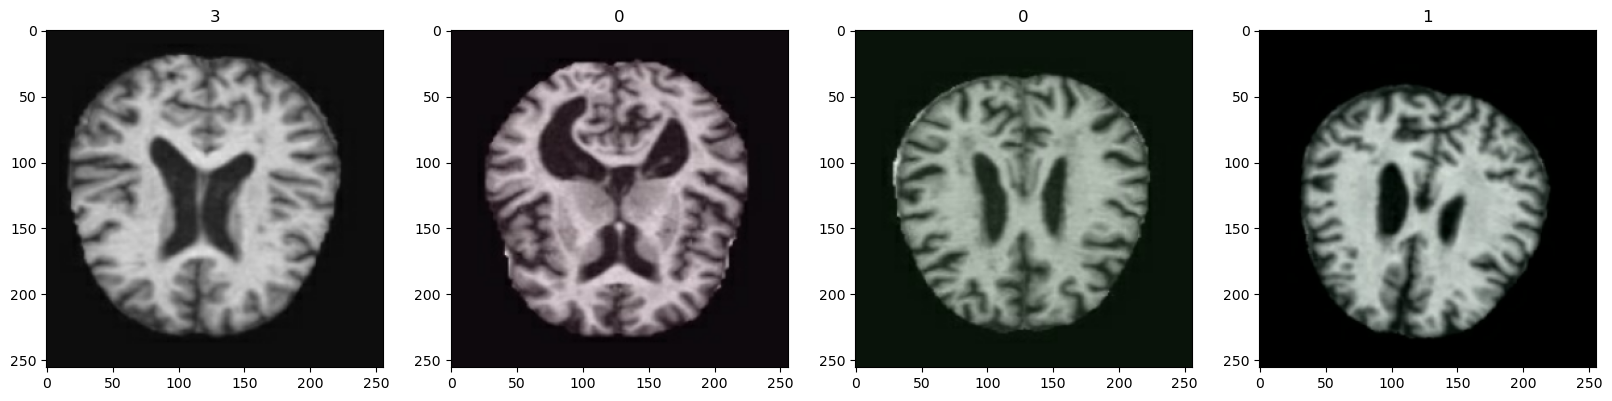

In [81]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20 , 20 ))

for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [86]:
class_names = sorted(os.listdir(dataset_folder))

# Example batch with numerical labels
batch_2 = data_iterator.next() 
labels = batch_2[1]

# Keep track of which classes have been displayed
shown_classes = set()

# Show one sample per class
for num_label, class_name in zip(labels, [class_names[label] for label in labels]):
    if class_name not in shown_classes:
        print(f"Label: {num_label}, Class Name: {class_name}")
        shown_classes.add(class_name)


Label: 3, Class Name: VeryMildDemented
Label: 2, Class Name: NonDemented
Label: 0, Class Name: MildDemented
Label: 1, Class Name: ModerateDemented
Label: 4, Class Name: unknown class


In [88]:
data = data.map(lambda x ,y : (x/255 ,y ))

In [89]:
scaled_data = data.as_numpy_iterator()

In [90]:
batch = scaled_data.next()

In [91]:
batch[0].max()

1.0

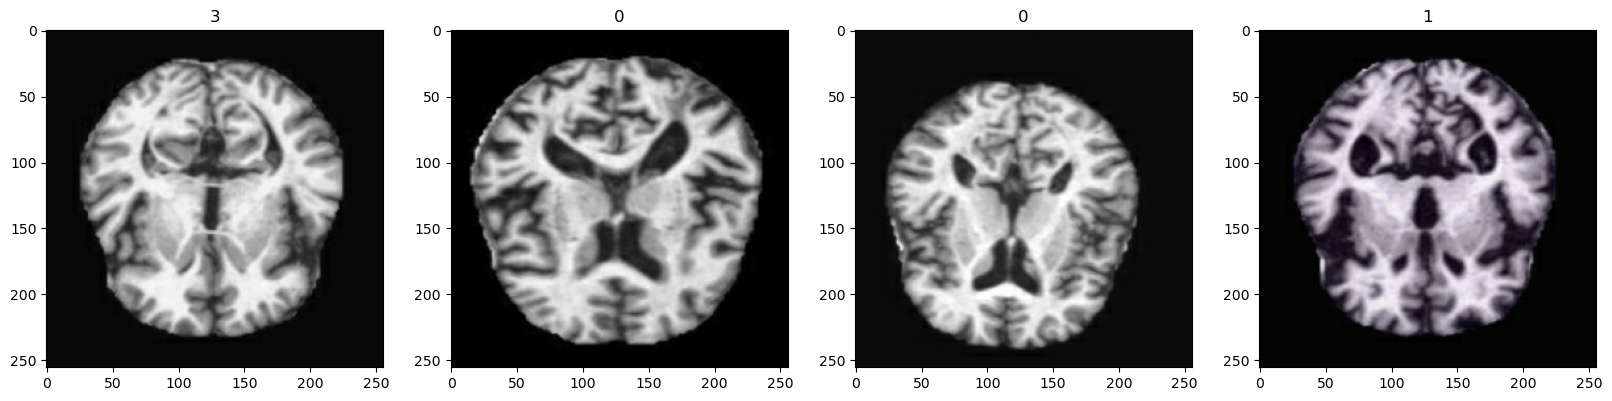

In [92]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20 , 20 ))

for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split Data 

In [93]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)+1

In [94]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Creating the CNN Model 

In [95]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  
])

In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
tensorbord_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

# Training the Model 

In [99]:
history = model.fit(train , epochs = 25 , validation_data = val , callbacks = [tensorbord_callback])

Epoch 1/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 818s 1s/step - accuracy: 0.4159 - loss: 1.2790 - val_accuracy: 0.6409 - val_loss: 0.7698
Epoch 2/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 843s 1s/step - accuracy: 0.6423 - loss: 0.7724 - val_accuracy: 0.7668 - val_loss: 0.5483
Epoch 3/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 839s 1s/step - accuracy: 0.7277 - loss: 0.5985 - val_accuracy: 0.8095 - val_loss: 0.4605
Epoch 4/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 837s 1s/step - accuracy: 0.7800 - loss: 0.4857 - val_accuracy: 0.8397 - val_loss: 0.3884
Epoch 5/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 838s 1s/step - accuracy: 0.8071 - loss: 0.4222 - val_accuracy: 0.8537 - val_loss: 0.3598
Epoch 6/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 846s 1s/step - accuracy: 0.8358 - loss: 0.3642 - val_accuracy: 0.8584 - val_loss: 0.3464
Epoch 7/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 831s 1s/step - accuracy: 0.8620 - loss: 0.3122 - val_accuracy: 0.8641 - val_loss: 0.3261
Epoch 8/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 842s 1s/step - accuracy: 0.8753 - loss: 0.2811 - val_accu

# Plot the Loss Function

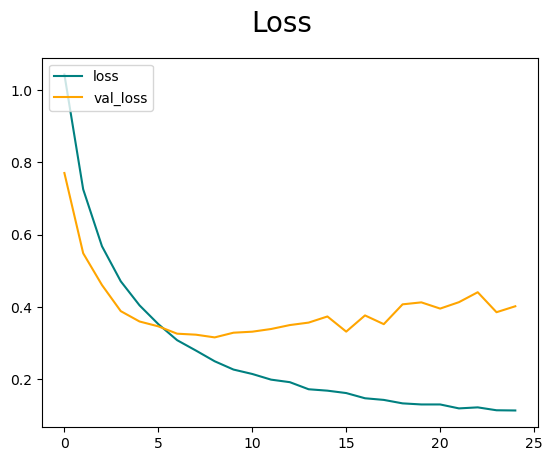

In [101]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Plot the Accuracy

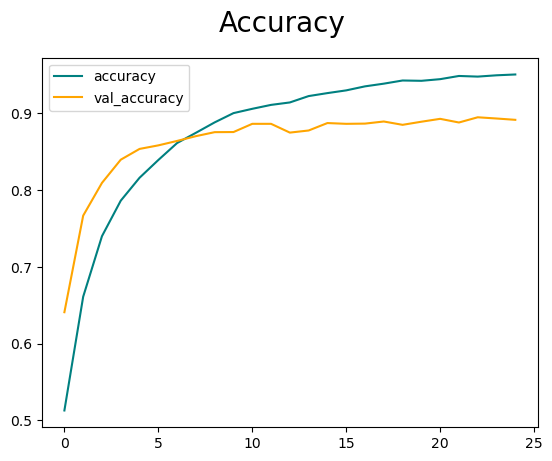

In [102]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Testing the Model 

In [103]:
from sklearn.metrics import classification_report

In [109]:
# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_predict = model.predict(X)
    y_pred_classes = np.argmax(y_predict, axis=1)
    
    y_true.extend(y) 
    y_pred.extend(y_pred_classes) 

# Convert lists to numpy arrays for metrics calculation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(classification_report(
    y_true, y_pred, 
    target_names=["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented", "unknown class"]
))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# Evaluate the Model 

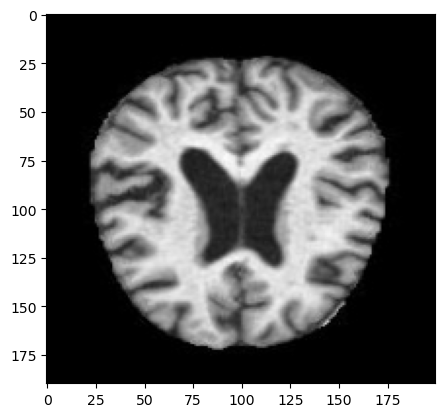

In [111]:
img = cv2.imread(r"C:\Users\Laith\OneDrive\Desktop\Evaluation data\Dont have it\00a9c4ad-c06d-431d-a5c9-1dc324db0632.jpg")
plt.imshow(img)
plt.show()

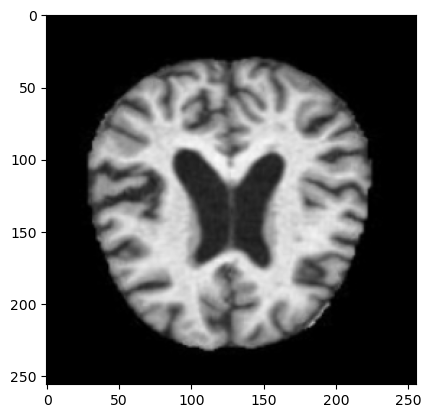

In [112]:
testing = tf.image.resize(img, (256,256))
plt.imshow(testing.numpy().astype(int))
plt.show()

In [125]:
def classify_image(img_path):
  
    img = image.load_img(img_path, target_size=(256, 256)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0 

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    confidence = predictions[0][predicted_class] * 100

    if predicted_class == 0:
        print("Mild Alzheimer")
    elif predicted_class == 1:
        print("Moderate Alzheimer")
    elif predicted_class == 2:
        print("Don't have Alzheimer")
    elif predicted_class == 3:
        print("Very Mild Alzheimer")
    elif predicted_class == 4:
        print("Unknown class")

    print(f"Confidence: {confidence:.2f}%") 

classify_image(r"C:\Users\Laith\OneDrive\Desktop\images.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Unknown class
Confidence: 100.00%


# Saving the Model 

In [106]:
model.save(os.path.join('Models', 'Alzheimer_Final_Model_forReal.keras'))

In [107]:
new_model = load_model(os.path.join('Models', 'Alzheimer_Final_Model_forReal.keras'))

In [108]:
new_model

<Sequential name=sequential_3, built=True>

In [126]:
def classify_image(img_path):
  
    img = image.load_img(img_path, target_size=(256, 256)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0 

    predictions = new_model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    confidence = predictions[0][predicted_class] * 100

    if predicted_class == 0:
        print("Mild Alzheimer")
    elif predicted_class == 1:
        print("Moderate Alzheimer")
    elif predicted_class == 2:
        print("Don't have Alzheimer")
    elif predicted_class == 3:
        print("Very Mild Alzheimer")
    elif predicted_class == 4:
        print("Unknown class")

    print(f"Confidence: {confidence:.2f}%") 

classify_image(r"C:\Users\Laith\OneDrive\Desktop\images.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Unknown class
Confidence: 100.00%
